In [32]:
# Install necessary libraries if not already installed
# !pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from pyvis.network import Network


In [ ]:
# Load the CSV dataset into a DataFrame
csv_file_path = 'data/pubmed_data04.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
df.head()

In [3]:
# Display the column names
print("Column Names:", df.columns)

# Basic statistics and information about the dataset
df.info()

Column Names: Index(['PubMed ID', 'Title', 'Abstract', 'Date', 'Authors', 'Keywords',
       'Citations', 'Affiliations', 'Journals'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PubMed ID     1000 non-null   int64  
 1   Title         955 non-null    object 
 2   Abstract      895 non-null    object 
 3   Date          0 non-null      float64
 4   Authors       973 non-null    object 
 5   Keywords      610 non-null    object 
 6   Citations     309 non-null    object 
 7   Affiliations  958 non-null    object 
 8   Journals      952 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PubMed ID     1000 non-null   int64  
 1   Title         955 non-null    object 
 2   Abstract      895 non-null    object 
 3   Date          0 non-null      float64
 4   Authors       973 non-null    object 
 5   Keywords      610 non-null    object 
 6   Citations     309 non-null    object 
 7   Affiliations  958 non-null    object 
 8   Journals      952 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


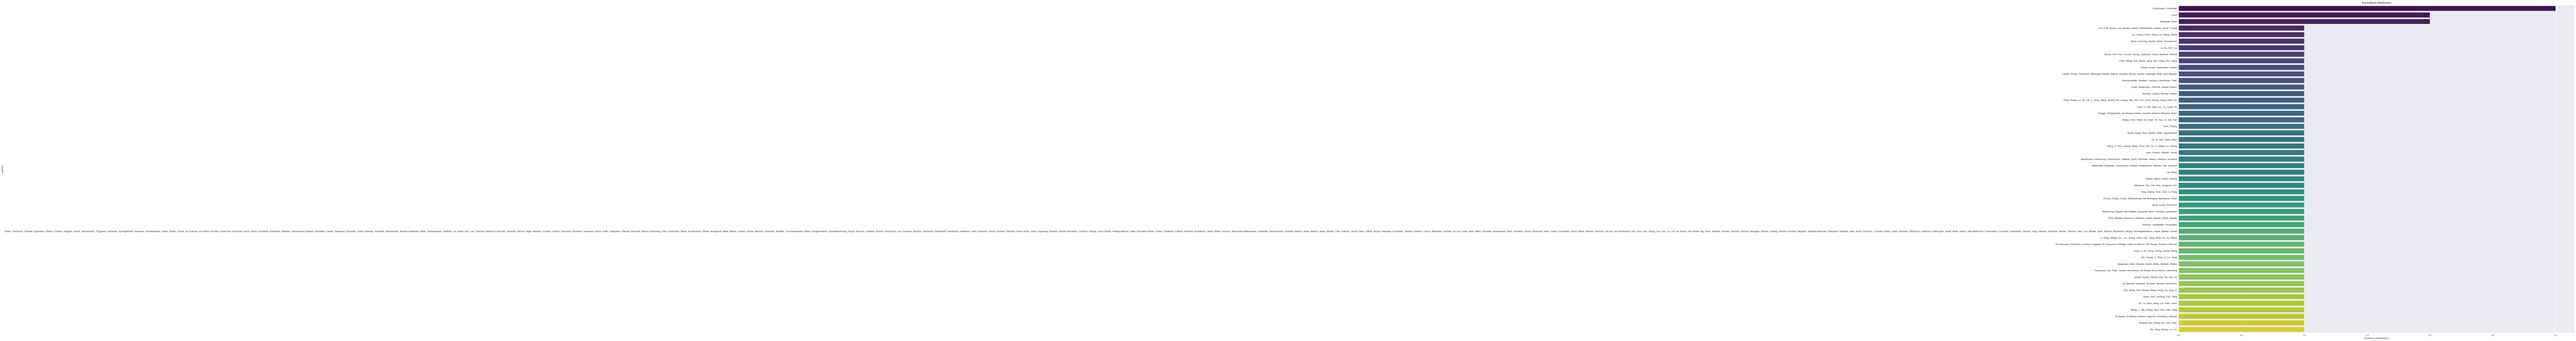

In [15]:
# Basic statistics and information about the dataset
df.info()

# Analyze distribution of categorical fields

# Distribution of Authors
authors_counts = df['Authors'].value_counts()
top_authors = authors_counts.head(50)  # Change the number based on your preference

# Plot the distribution of top authors
plt.figure(figsize=(30, 25))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top Authors Distribution')
plt.xlabel('Number of Publications')
plt.ylabel('Authors')
# Save the plot as a PNG file
plt.savefig('top_authors_distribution.png')
plt.show()


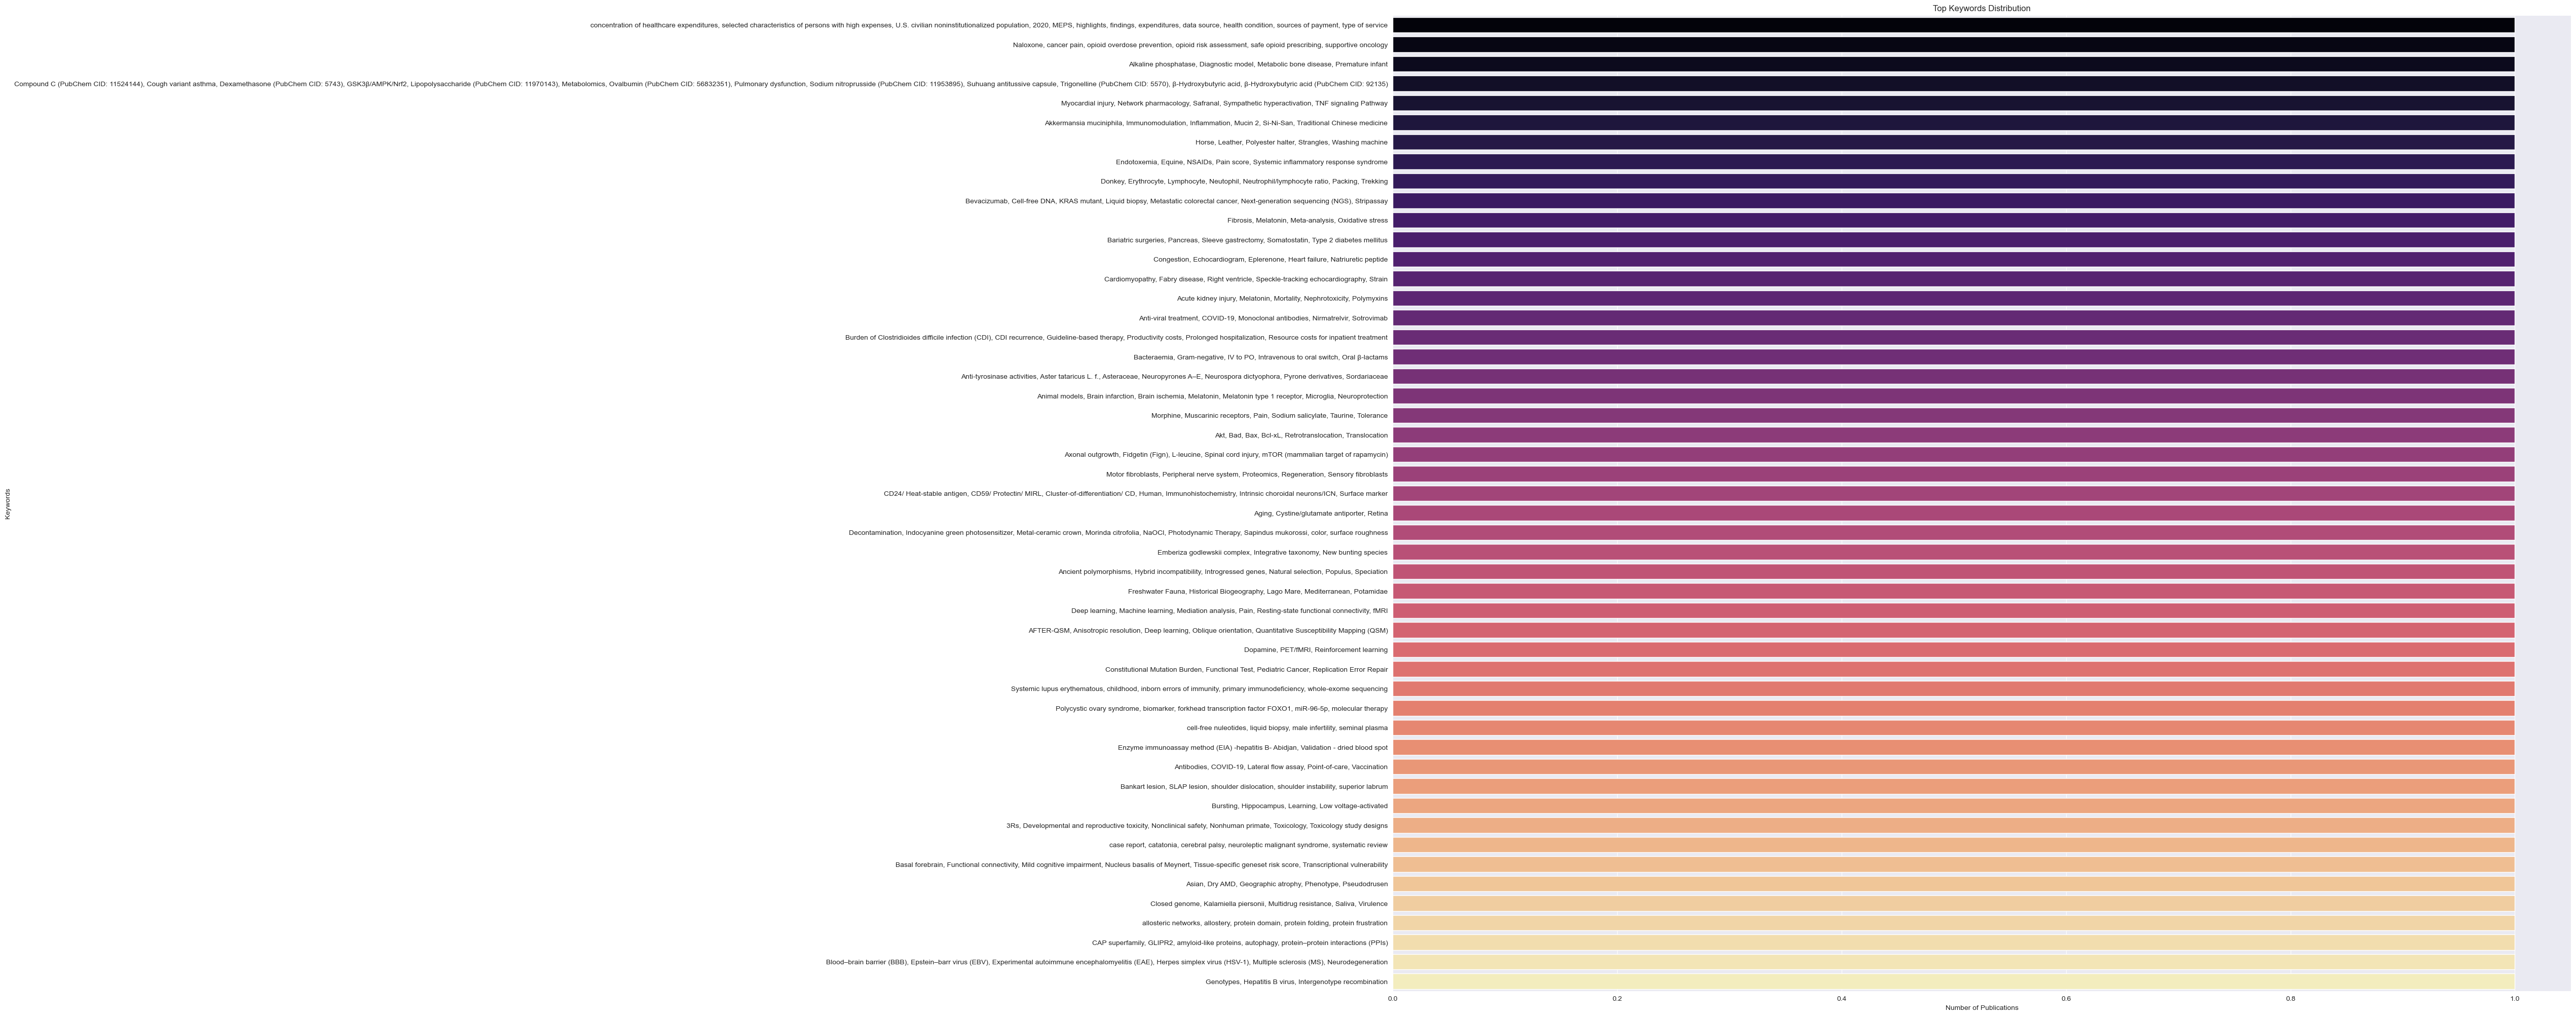

In [16]:
#All count to 1. Useless statistics
# Distribution of Keywords
keywords_counts = df['Keywords'].value_counts()
top_keywords = keywords_counts.head(50)  # Change the number based on your preference

# Plot the distribution of top keywords
plt.figure(figsize=(30, 25))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='magma')
plt.title('Top Keywords Distribution')
plt.xlabel('Number of Publications')
plt.ylabel('Keywords')
# Save the plot as a PNG file
plt.savefig('top_keywords_distribution.png')
plt.show()

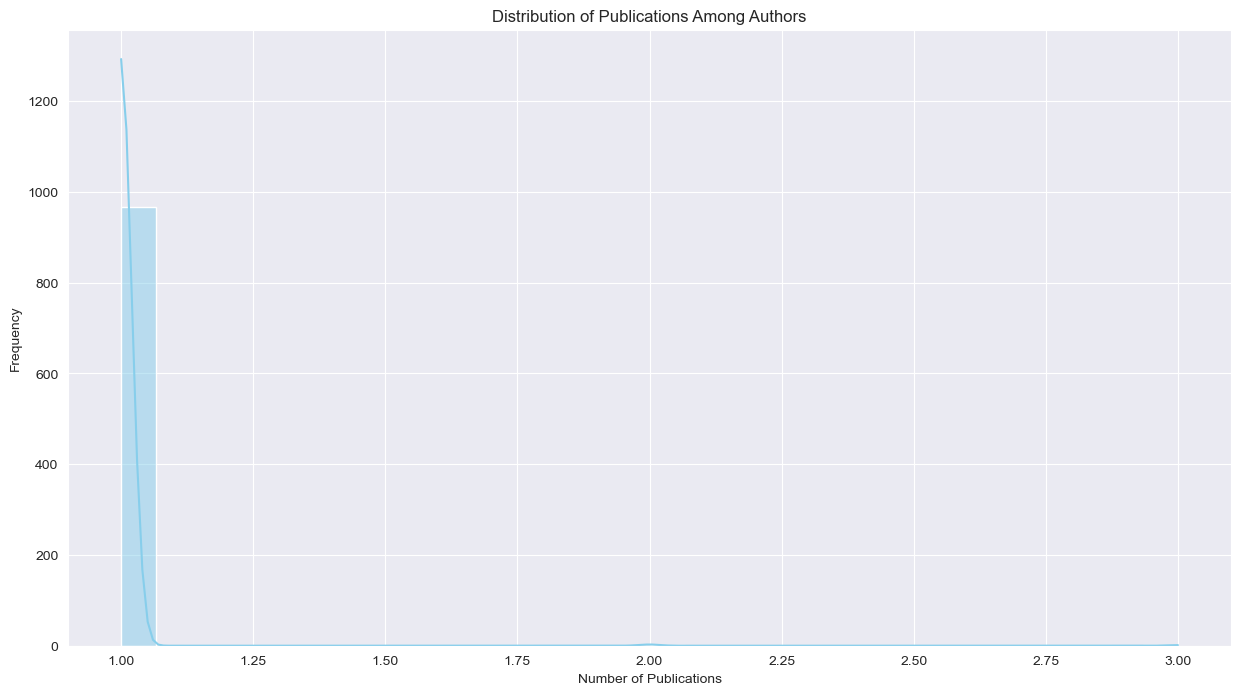

In [18]:
# Calculate the number of publications per author
author_publications = df['Authors'].value_counts()

# Plot the distribution of the number of publications among different authors
plt.figure(figsize=(15, 8))
sns.histplot(author_publications, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Publications Among Authors')
plt.xlabel('Number of Publications')
plt.ylabel('Frequency')
plt.show()

Peak on the left implies that the majority of authors have a low number of publications.
Tail to the right implies that only a few authors have a very high number of publications (Is it 0 though? May be cross-check once more data is collected)

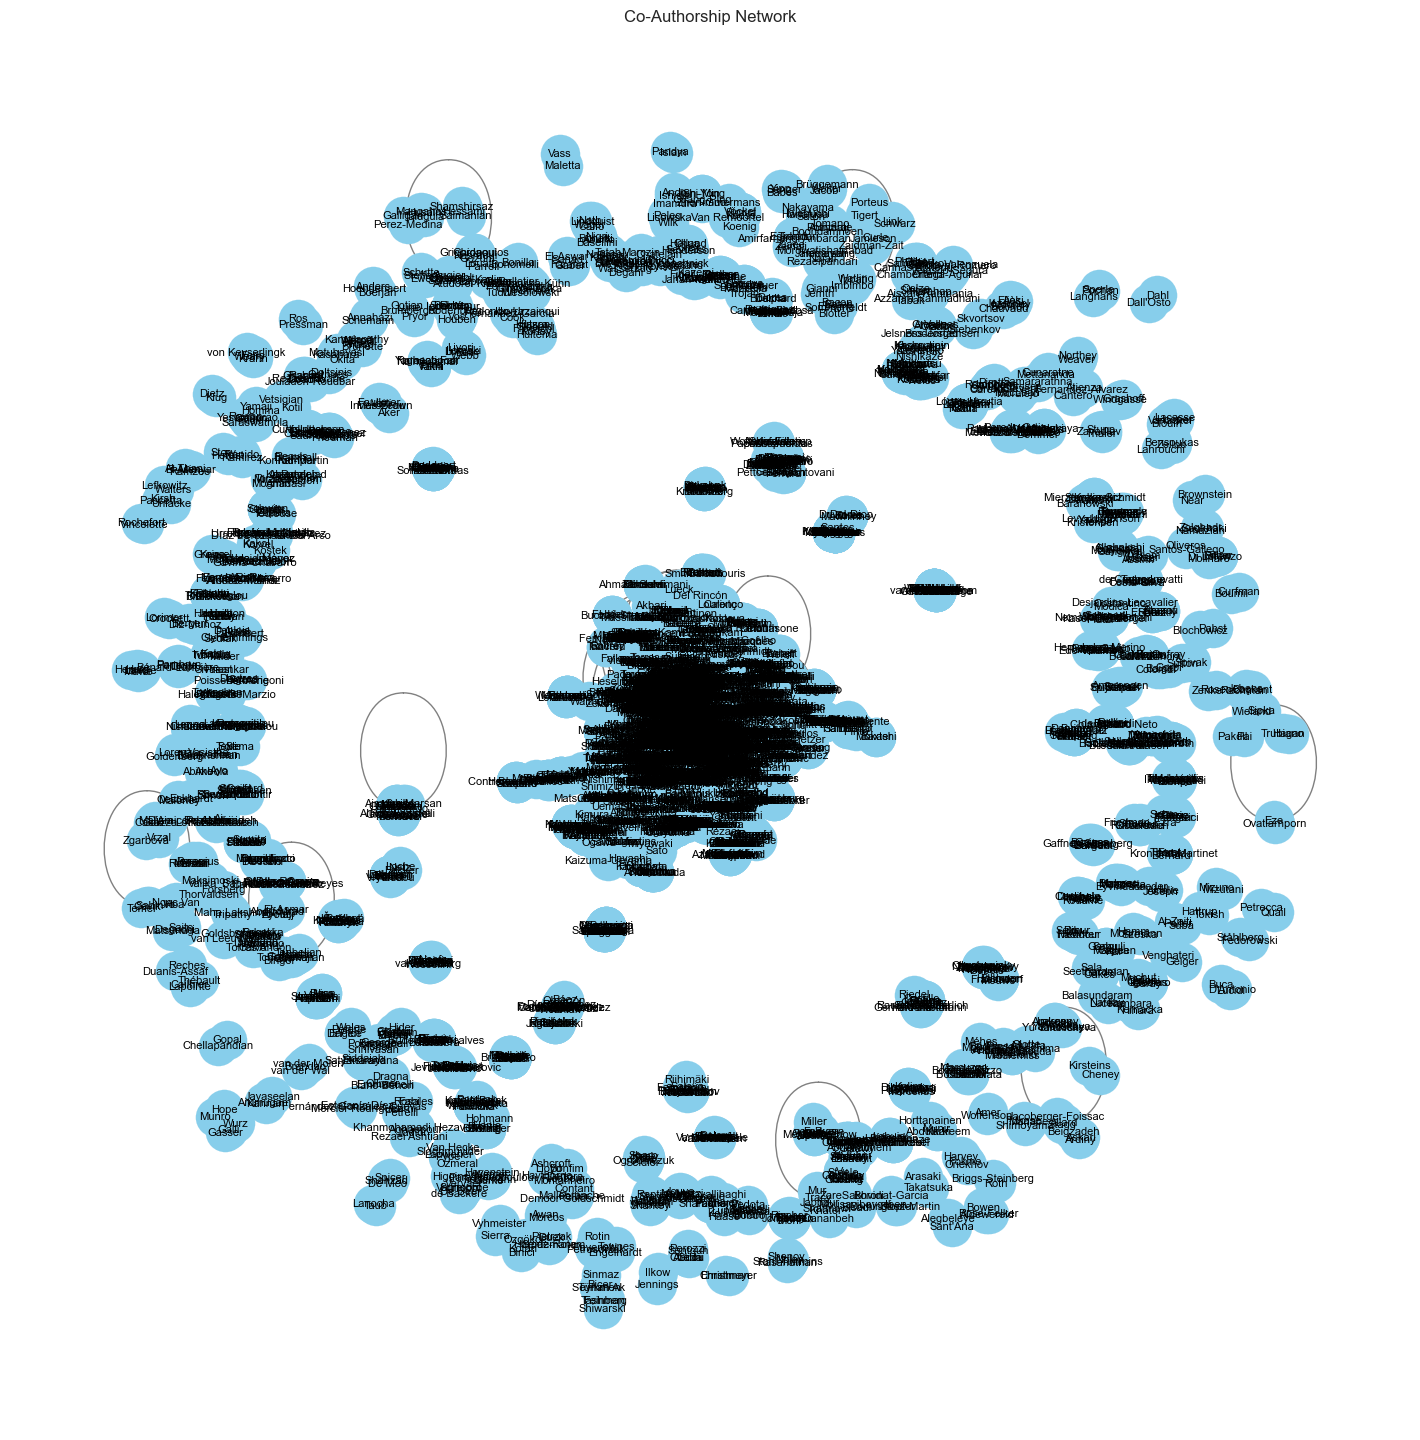

In [27]:
# Create a co-authorship network
G = nx.Graph()

# Iterate through each row in the DataFrame and add edges between co-authors
for index, row in df.iterrows():
    authors = str(row['Authors'])  # Convert to string to handle NaN values
    if pd.notna(authors):  # Check for NaN values
        authors = authors.split(', ')

        # Add edges between co-authors
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                G.add_edge(authors[i], authors[j])

# Calculate node positions using a force-directed layout for better readability
pos = nx.spring_layout(G, seed=42)

# Visualize the co-authorship network
plt.figure(figsize=(14, 14))
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, node_color='skyblue', edge_color='gray', linewidths=0.1)
plt.title('Co-Authorship Network')
# Save the plot as an image file (e.g., PNG)
plt.savefig('co_authorship_network.png')
plt.show()